In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [2]:
dat = pd.read_pickle('/Users/nshah/work/vcimpute/data/experiment3_general.pkl')

In [3]:
df = pd.DataFrame(
    [e for lst in dat for e in lst],
    columns=['method', 'seed', 'n_fits', 'n_inference', 'mdps', 'cc', 'smae', 'elapsed_ns', 'bias']
)

In [4]:
df['elapsed_s'] = df['elapsed_ns'] / int(1e9)

In [5]:
df['n_inference'] = np.where(df['method'] =='gcimpute', df['mdps'], df['n_inference'])

In [45]:
print(df.groupby(['method', 'mdps'])[['smae', 'bias', 'elapsed_s', 'n_fits', 'n_inference']].mean().to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrr}
\toprule
       &    &  smae &  bias &  elapsed\_s &  n\_fits &  n\_inference \\
method & mdps &       &       &            &         &              \\
\midrule
copfit & 20 &  0.84 &  0.02 &       8.06 &    1.00 &        81.15 \\
copreg & 20 &  0.79 &  0.02 &      43.16 &   40.00 &        40.00 \\
gcimpute & 20 &  0.58 &  0.03 &       0.26 &    1.00 &        20.00 \\
mdpfit & 20 &  0.87 &  0.03 &      21.96 &   19.40 &        20.00 \\
\bottomrule
\end{tabular}



In [7]:
df.groupby(['method', 'mdps','n_fits','n_inference'])['elapsed_s'].mean()

method    mdps  n_fits  n_inference
copfit    20    1       69              7.974159
                        72              7.926812
                        73              7.800724
                        74              7.929799
                        75              7.899603
                        76              7.979371
                        77              7.984864
                        78              7.991166
                        79              7.971714
                        80              8.038370
                        81              8.052773
                        82              8.087135
                        83              8.116863
                        84              8.108318
                        85              8.158554
                        86              8.117565
                        87              8.214059
                        88              8.198533
                        89              8.388743
                        90       

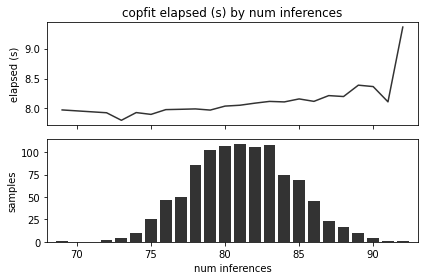

In [41]:
srs1 = df[df['method'] == 'copfit'].groupby('n_inference')['elapsed_s'].mean()
srs2 = df[df['method'] == 'copfit'].groupby('n_inference')['elapsed_s'].count()
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(srs1.index, srs1.values, c='k', alpha=0.8)
ax[0].set_ylabel('elapsed (s)')
ax[1].bar(srs2.index, srs2.values, color='k', alpha=0.8)
ax[1].set_ylabel('samples')
plt.xlabel('num inferences')
ax[0].set_title('copfit elapsed (s) by num inferences')
plt.xlim([srs1.index.min()-1, srs1.index.max()+1])
plt.tight_layout()
plt.savefig('copfit5d.png', dpi=300)

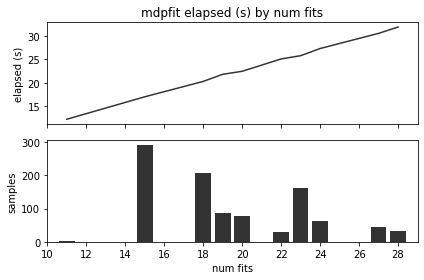

In [42]:
import matplotlib.ticker as mticker

srs1 = df[df['method'] == 'mdpfit'].groupby('n_fits')['elapsed_s'].mean()
srs2 = df[df['method'] == 'mdpfit'].groupby('n_fits')['elapsed_s'].count()
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(srs1.index, srs1.values, color='k', alpha=0.8)
ax[0].set_ylabel('elapsed (s)')
ax[1].bar(srs2.index, srs2.values, color='k', alpha=0.8)
ax[1].set_ylabel('samples')
ax[0].xaxis.set_major_locator(mticker.MultipleLocator(2))
ax[1].xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.xlabel('num fits')
ax[0].set_title('mdpfit elapsed (s) by num fits')
plt.xlim([srs1.index.min()-1, srs1.index.max()+1])
plt.tight_layout()
plt.savefig('mdpfit5d.png', dpi=300)